In [27]:
import numpy as np

X = np.linspace(start=0, stop=10, num=1_000).reshape(-1, 1)
y = np.squeeze(X * np.sin(X))

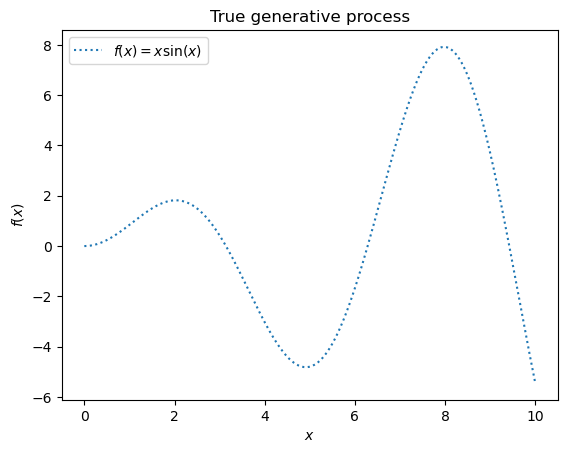

In [28]:
import matplotlib.pyplot as plt

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("True generative process")

In [29]:
rng = np.random.RandomState(2137)
training_indices = rng.choice(np.arange(y.size), size=10, replace=False)
X_train, y_train = X[training_indices], y[training_indices]
training_indices

array([ 91, 745, 716, 976,  97, 630, 596, 140, 672,  72])

In [30]:
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

kernel = 1 * RBF()
gaussian_process = GaussianProcessRegressor(
    kernel=kernel, n_restarts_optimizer=9, random_state=rng
)
gaussian_process.fit(X_train, y_train)
gaussian_process.kernel_

10.6**2 * RBF(length_scale=2.42)

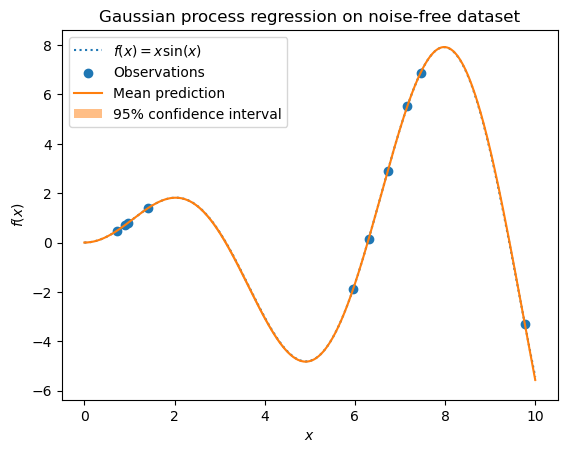

In [31]:
y_pred, std_prediction = gaussian_process.predict(X, return_std=True)

plt.plot(X, y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(X_train, y_train, label="Observations")
plt.plot(X, y_pred, label="Mean prediction")
plt.fill_between(
    X.ravel(),
    y_pred - 1.96 * std_prediction,
    y_pred + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
_ = plt.title("Gaussian process regression on noise-free dataset")

In [32]:
import seaborn as sns

<Axes: >

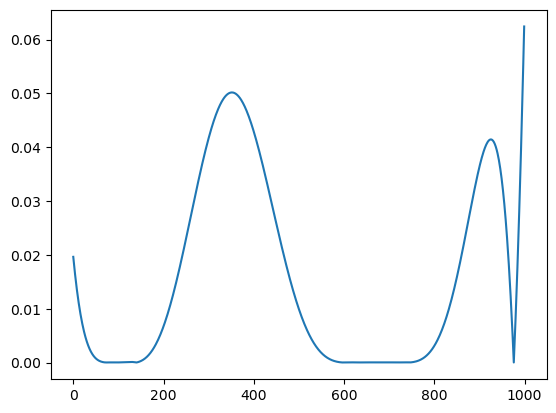

In [33]:
sns.lineplot(std_prediction)

In [34]:
from sklearn.model_selection import LeaveOneOut

training_indices = rng.choice(np.arange(y.size), size=5, replace=False)
X_train, y_train = X[training_indices], y[training_indices]
loo = LeaveOneOut()
loo.get_n_splits(X_train)

5

In [35]:
import warnings

from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [36]:
y_preds = []

for i, (train_index, test_index) in enumerate(loo.split(X_train)):

    kernel = 1 * RBF()
    gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
    gaussian_process.fit(X_train[train_index], y_train[train_index])
    y_pred, std_prediction = gaussian_process.predict(
        X_train[test_index], return_std=True
    )
    true = y_train[test_index]

    print(f"For {X_train[test_index]} we predicted {y_pred} but True value is: {true}")
    y_preds.append(y_pred)

For [[4.27427427]] we predicted [-0.01712832] but True value is: [-3.87058222]
For [[8.08808809]] we predicted [8.28589987] but True value is: [7.86746129]
For [[2.15215215]] we predicted [-0.9295405] but True value is: [1.79859414]
For [[7.06706707]] we predicted [6.13108996] but True value is: [4.98958758]
For [[7.85785786]] we predicted [7.52209914] but True value is: [7.85779883]


In [37]:
y_preds = np.array(y_preds).flatten()

In [38]:
# y_preds, y_train

In [39]:
from sklearn.metrics import r2_score


r2_score(y_train, y_preds)

0.7544025901884427